In [ ]:
#Had previously submitted the notebook we worked on with Daniel but there was a big miscommunication and later realised that the model hadn't been validated to the new data set. 
#Decided to submit my own notebook, results should be similar to Daniel's and Tom's as we roughly followed the same route, but in a different way (and slight changes in data selection). Hope that's OK.

In [1]:
import pandas as pd
data = pd.read_csv('fifa21_train.csv')

In [2]:
data.shape

(11701, 101)

In [3]:
pd.set_option('display.max_columns', None)

In [ ]:
#looking at the data and trying to understand numericals

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11701.0,219436.649004,37480.006004,27.0,204060.0,229040.0,244176.0,259090.0
Age,11701.0,25.270490,4.957640,16.0,21.0,25.0,29.0,43.0
Growth,11701.0,5.534655,5.810903,-1.0,0.0,4.0,10.0,26.0
Attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
Crossing,11701.0,51.593795,17.872747,6.0,41.0,56.0,65.0,94.0
Finishing,11701.0,48.048116,19.399617,3.0,33.0,52.0,64.0,95.0
Heading Accuracy,11701.0,53.494060,16.956195,5.0,46.0,56.0,65.0,93.0
Short Passing,11701.0,60.436800,13.971811,8.0,56.0,63.0,69.0,94.0
Volleys,11660.0,45.067324,17.732902,4.0,32.0,47.0,59.0,90.0
Skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0


In [5]:
data.dtypes

ID              int64
Name           object
Age             int64
Nationality    object
Club           object
                ...  
CB             object
RCB            object
RB             object
GK             object
OVA             int64
Length: 101, dtype: object

In [ ]:
#cleaning the data

In [6]:
def cleaning (x):
    data.columns = data.columns.str.replace(' ', '_')
    cols = []
    for column in data.columns:
        cols.append(column.lower())
    data.columns = cols
    return (x)
cleaning(data)
data.head()

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [ ]:
#converting weight to numerical
#most importantly picking the highest score from all the Position scores, splitting removing the "+" and figure, to keep numerical. 

In [7]:
data["weight_num"] = data["weight"]
data.weight_num = data['weight_num'].astype(str)
data.weight_num = data.weight_num.str.replace('lbs', '')
data['weight_num'] =  pd.to_numeric(data['weight_num'], errors='coerce')

In [8]:
data["max_score"] = data[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']].max(axis=1)
data.max_score = data['max_score'].astype(str)
data.max_score = data.max_score.str[:2]
data['max_score'] =  pd.to_numeric(data['max_score'], errors='coerce')

In [9]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df 

,header_name,percent_nulls
0,id,0.00
1,name,0.00
2,age,0.00
3,nationality,0.00
4,club,0.15
...,...,...
98,rb,0.00
99,gk,0.00
100,ova,0.00
101,weight_num,0.00


In [ ]:
#the columns I want to use don't have NaNs, except the new max_score, so dropping those records. 

In [10]:
data = data[data['max_score'].isna()==False]

In [11]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df 

,header_name,percent_nulls
0,id,0.00
1,name,0.00
2,age,0.00
3,nationality,0.00
4,club,0.15
...,...,...
98,rb,0.00
99,gk,0.00
100,ova,0.00
101,weight_num,0.00


In [12]:
numeric = data._get_numeric_data()
numeric.head()

,id,age,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova,weight_num,max_score
0,184383,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64,161,63.0
1,188044,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77,159,77.0
2,184431,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80,134,80.0
3,233796,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59,152,58.0
4,234799,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65,150,64.0


In [13]:
numeric.shape

(11700, 55)

In [14]:
cat = data.select_dtypes(['object'])
cat.head()

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,loan_date_end,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,4 ★,4★,High,Medium,2 ★,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,2 ★,2★,Medium,Medium,1 ★,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,2 ★,3★,Low,Medium,1 ★,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2


In [ ]:
#saw that some columns are a sum of others so keeping only the sums, and other relevant data. 

In [16]:
num_clean= data[['age','growth','attacking','skill','movement','power','mentality','defending','goalkeeping','total_stats','base_stats','pac','sho','pas','dri','def','phy','ova','max_score','weight_num']]

In [18]:
num_clean.head()

,age,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova,max_score,weight_num
0,26,1,258,286,346,306,290,148,48,1682,357,69,51,63,63,51,60,64,63.0,161
1,30,0,365,375,404,372,313,77,55,1961,412,83,75,68,82,33,71,77,77.0,159
2,33,0,336,424,424,308,332,80,21,1925,404,80,77,78,86,27,56,80,80.0,134
3,22,13,242,259,282,277,257,168,42,1527,329,57,44,54,57,57,60,59,58.0,152
4,23,8,249,280,324,280,294,185,52,1664,360,66,44,60,64,60,66,65,64.0,150


In [ ]:
#double check there are no more NaNs in the data set. 

In [19]:
num_clean.isna().sum()
round(num_clean.isna().sum()/len(num_clean),4)*100
nulls_df = pd.DataFrame(round(num_clean.isna().sum()/len(num_clean),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df 

,header_name,percent_nulls
0,age,0.0
1,growth,0.0
2,attacking,0.0
3,skill,0.0
4,movement,0.0
5,power,0.0
6,mentality,0.0
7,defending,0.0
8,goalkeeping,0.0
9,total_stats,0.0


In [20]:
correlations_matrix = num_clean.corr()
correlations_matrix

,age,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova,max_score,weight_num
age,1.000000,-0.854140,0.191171,0.176067,-0.051802,0.314131,0.278788,0.117869,0.120620,0.286424,0.417614,-0.176251,0.311189,0.402433,0.242746,0.225242,0.434429,0.519801,0.520222,0.257359
growth,-0.854140,1.000000,-0.281683,-0.262939,-0.101371,-0.427798,-0.348022,-0.157732,-0.050305,-0.395491,-0.516134,0.019683,-0.334896,-0.439817,-0.320605,-0.240234,-0.484195,-0.596641,-0.594310,-0.219631
attacking,0.191171,-0.281683,1.000000,0.928603,0.692499,0.823618,0.888638,0.311405,-0.769821,0.902880,0.425959,0.181133,0.349929,0.370158,0.379955,0.103253,0.108030,0.433103,0.470150,-0.250884
skill,0.176067,-0.262939,0.928603,1.000000,0.725823,0.753258,0.886004,0.370536,-0.716250,0.927809,0.499761,0.217091,0.325017,0.514056,0.486217,0.171946,0.031354,0.442711,0.476576,-0.352454
movement,-0.051802,-0.101371,0.692499,0.725823,1.000000,0.560517,0.610666,0.174075,-0.563048,0.737898,0.450303,0.705491,0.227513,0.307432,0.497638,0.008549,-0.111613,0.304496,0.322776,-0.536491
power,0.314131,-0.427798,0.823618,0.753258,0.560517,1.000000,0.823435,0.361781,-0.573787,0.865168,0.573165,0.157675,0.374826,0.356101,0.332807,0.248263,0.519895,0.547853,0.575689,0.007598
mentality,0.278788,-0.348022,0.888638,0.886004,0.610666,0.823435,1.000000,0.587899,-0.727704,0.947376,0.515567,0.065611,0.186773,0.408823,0.308290,0.429292,0.312189,0.494589,0.520833,-0.197286
defending,0.117869,-0.157732,0.311405,0.370536,0.174075,0.361781,0.587899,1.000000,-0.496337,0.524867,0.221114,-0.213745,-0.485339,0.061677,-0.205578,0.928767,0.388664,0.243722,0.236206,-0.040936
goalkeeping,0.120620,-0.050305,-0.769821,-0.716250,-0.563048,-0.573787,-0.727704,-0.496337,1.000000,-0.634596,0.097680,-0.004271,0.246639,0.171370,0.160626,-0.199190,0.061885,0.038576,0.005142,0.321475
total_stats,0.286424,-0.395491,0.902880,0.927809,0.737898,0.865168,0.947376,0.524867,-0.634596,1.000000,0.677154,0.257915,0.319693,0.553748,0.493440,0.389361,0.301003,0.608433,0.632005,-0.242913


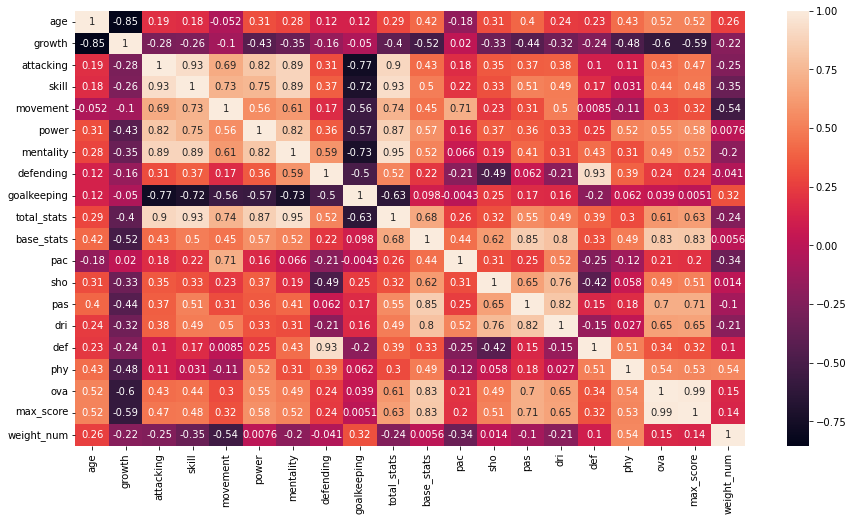

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize = (15,8))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#I could see the huge correlation between the max_score and the overall result so after some back and forth decided not to use the categoricals as they weren't bringing much, I focused on the numericals - max_score for the model.  

In [22]:
y2 = num_clean['ova']
X2 = num_clean.drop(['ova'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [24]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(9360, 19)
(2340, 19)
(9360,)
(2340,)


In [25]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X2_train,y2_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
predictions = lm.predict(X2_train)
r2_score(y2_train, predictions)

0.9825009121344273

In [27]:
predictions = lm.predict(X2_test)
r2_score(y2_test, predictions)

0.9833194207574927

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y2_test,predictions))
print(mse)

0.8945992322359523


In [29]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y2_test, predictions)
print(mae)

0.6368383156590556


In [30]:
import math
rmse = math.sqrt(mse)
print(rmse)

0.9458325603593652


In [ ]:
# Clearly the model is very fitted thanks for the addition of the max_score. Will now validate on new data. 

# Validating

In [48]:
import pandas as pd
data_val = pd.read_csv('fifa21_validate.csv')

In [49]:
data_val.shape

(1999, 101)

In [ ]:
#running all the same cleaning and transformation steps on the new data.

In [50]:
def cleaning (x):
    data_val.columns = data_val.columns.str.replace(' ', '_')
    cols = []
    for column in data_val.columns:
        cols.append(column.lower())
    data_val.columns = cols
    return (x)
cleaning(data_val)
data_val.head()

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [51]:
data_val["weight_num"] = data_val["weight"]
data_val.weight_num = data_val['weight_num'].astype(str)
data_val.weight_num = data_val.weight_num.str.replace('lbs', '')
data_val['weight_num'] =  pd.to_numeric(data_val['weight_num'], errors='coerce')

In [52]:
data_val["max_score"] = data_val[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']].max(axis=1)
data_val.max_score = data_val['max_score'].astype(str)
data_val.max_score = data_val.max_score.str[:2]
data_val['max_score'] =  pd.to_numeric(data_val['max_score'], errors='coerce')

In [53]:
data_val.isna().sum()
round(data_val.isna().sum()/len(data_val),4)*100
nulls_df = pd.DataFrame(round(data_val.isna().sum()/len(data_val),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df 

,header_name,percent_nulls
0,id,0.00
1,name,0.00
2,age,0.00
3,nationality,0.00
4,club,0.15
...,...,...
98,rb,0.00
99,gk,0.00
100,ova,0.00
101,weight_num,0.00


In [54]:
data_val = data_val[data_val['max_score'].isna()==False]

In [55]:
data_val.isna().sum()
round(data_val.isna().sum()/len(data_val),4)*100
nulls_df = pd.DataFrame(round(data_val.isna().sum()/len(data_val),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df 

,header_name,percent_nulls
0,id,0.00
1,name,0.00
2,age,0.00
3,nationality,0.00
4,club,0.15
...,...,...
98,rb,0.00
99,gk,0.00
100,ova,0.00
101,weight_num,0.00


In [57]:
numeric_val = data_val._get_numeric_data()
numeric_val.head()

,id,age,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova,weight_num,max_score
0,219461,23,7,230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,64,30,50,50,66,74,67,194,67.0
1,221896,22,5,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,74,67,62,74,24,57,68,154,68.0
2,247428,19,17,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,56,52,53,55,26,53,54,176,53.0
3,255120,16,23,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,58,34,47,52,53,59,55,170,54.0
4,215556,24,5,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,67,62,68,70,69,71,70,170,72.0


In [58]:
num_valclean= data_val[['age','growth','attacking','skill','movement','power','mentality','defending','goalkeeping','total_stats','base_stats','pac','sho','pas','dri','def','phy','ova','max_score','weight_num']]

In [ ]:
#now have a clean data set to validate the model. Will run the prediction and see the new results. 

In [59]:
y_val = num_valclean['ova']
X_val = num_valclean.drop(['ova'], axis=1)

In [60]:
predictions = lm.predict(X_val)
r2_score(y_val, predictions)

0.9809401383767242

In [62]:
mse=np.sqrt(mean_squared_error(y_val,predictions))
print(mse)

0.9343446171593237


In [64]:
mae = mean_absolute_error(y_val, predictions)
print(mae)

0.6439141339768266


In [65]:
rmse = math.sqrt(mse)
print(rmse)

0.9666150304848997


In [ ]:
#The R2 has dropped a little, bu remains really high so the model is working very well. 

In [ ]:
#Below the OneHotEncoder I had used, but once seeing it had very little influence on the results, decided to drop the categories all together.

In [36]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder().fit(cat_clean)
# print(encoder.categories_)
# encoded = encoder.transform(cat_clean).toarray()
# print(encoded)
# cols = [colname for row in encoder.categories_ for colname in row]
# cols
# onehot_encoded = pd.DataFrame(encoded, columns=cols)
# cols_to_drop = [row[0] for row in encoder.categories_]
# cols_to_drop
# onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
# onehot_encoded.head()

In [39]:
# X2 = pd.concat([num_norm, onehot_encoded], axis=1)

In [40]:
# y2 = num_clean['ova']